# Reto 02
A continuación vamos a aplicar nuevos filtros y a 'quitar el fondo' de nuestra imagen. Éxito

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
creed = cv2.imread("Creed.jpg", cv2.IMREAD_COLOR)
creed = cv2.cvtColor(creed, cv2.COLOR_BGR2RGB)

In [3]:
rocky = cv2.imread("Rocky.jpg", cv2.IMREAD_COLOR)
rocky = cv2.cvtColor(rocky, cv2.COLOR_BGR2RGB)

In [4]:
rockyBN = cv2.imread("RockyBN.jpg", cv2.IMREAD_COLOR)
rockyBN = cv2.cvtColor(rockyBN, cv2.COLOR_BGR2RGB)

In [5]:
rockyDrago = cv2.imread("Rocky_vs_Drago.jpg", cv2.IMREAD_COLOR)
rockyDrago = cv2.cvtColor(rockyDrago, cv2.COLOR_BGR2RGB)

## Paso 01
A continuación debe aplicar el filtro de escala de grises a la imagen 'Creed' (el hijo de Ivan Drago sentado en su esquina). Una vez aplicado, desplieguelo en pantalla

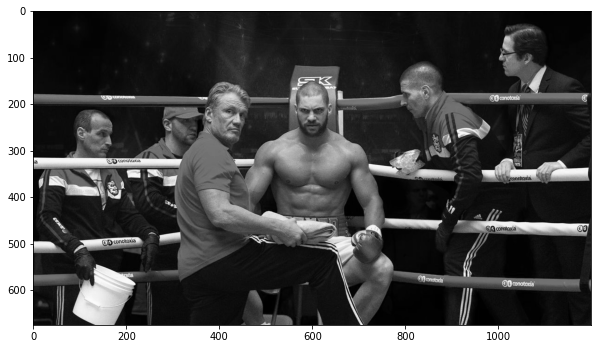

In [8]:
def toGrayScale(im):
    im = np.sum(im, axis = 2) / 3    
    return im

grayCreed = toGrayScale(creed)
plt.figure(figsize=(10,10))
plt.imshow(grayCreed, cmap=plt.cm.gray);

## Paso 02
Ahora binarice la misma imagen 'Creed' (use el conocimiento motrado en el ejemplo previo), y muestrela en pantalla. El resultado debe ser algo algo escalofriante.

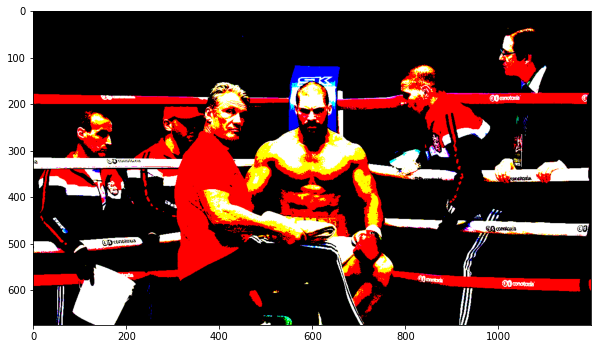

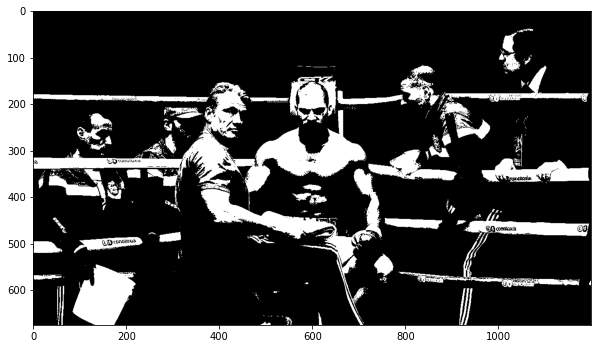

In [22]:
def toBinary(im, threshold):
    im = np.where(im > threshold, 255, 0)
    return im

creedBin = toBinary(creed, 110)
plt.figure(figsize=(10,10))
plt.imshow(creedBin, cmap=plt.cm.gray);

creedBin = toBinary(grayCreed, 110)
plt.figure(figsize=(10,10))
plt.imshow(creedBin, cmap=plt.cm.gray);

## Paso 03
Ahora reduzca los espacios de color para la imagen 'Rocky_vs_Drago', e imprima para:
- 3 espacios
- 6 espacios
- 9 espacios
- 20 espacios

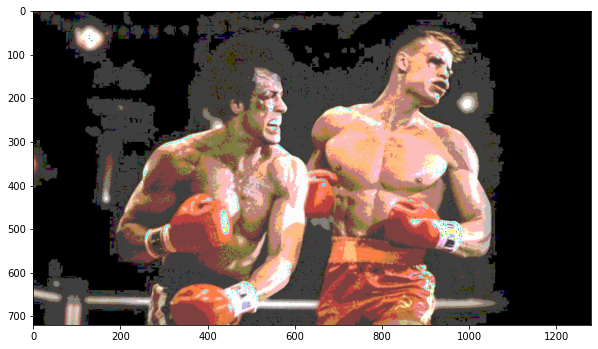

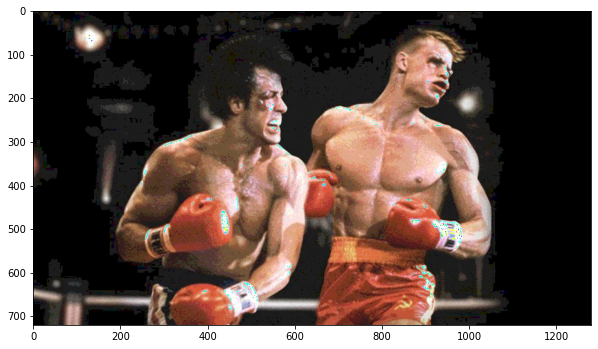

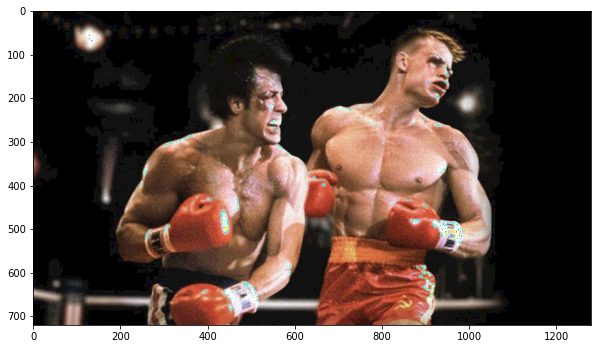

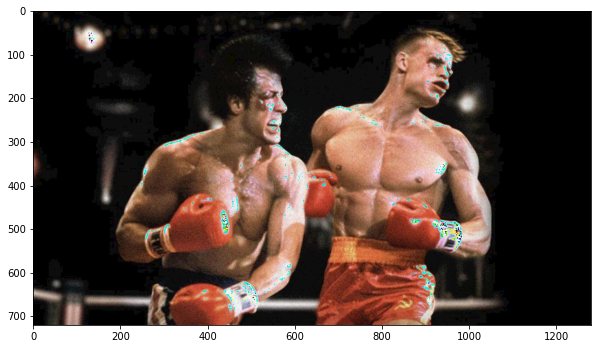

In [24]:
def colorReduction(im, numColors):
    if numColors <= 0:
        raise ValueError("Number of colores must be greater than 0")
    
    step = int(255 / (numColors))
    for counter in range (0, 255, step):
        if counter == 0:
            temp = np.zeros_like(im)
        else:
            filter = np.where(((im > (counter - step)) & (im <= counter)), counter, 0)
            temp = np.add(temp, filter)
    return temp


for colors in range(4, 20, 5):
    imgColors = colorReduction(rockyDrago, colors)
    plt.figure(figsize=(10,10))
    plt.imshow(imgColors, cmap=plt.cm.gray)

## Paso 04
Ahora usaras la imagen 'RockyBN'. Solo debes hacer que los colores se inviertan y unicamente se muestre el trazo de rocky en blanco con fondo negro. Este paso es más díficil, pide ayuda a un TAA o al experto en caso de que tengas dificultades

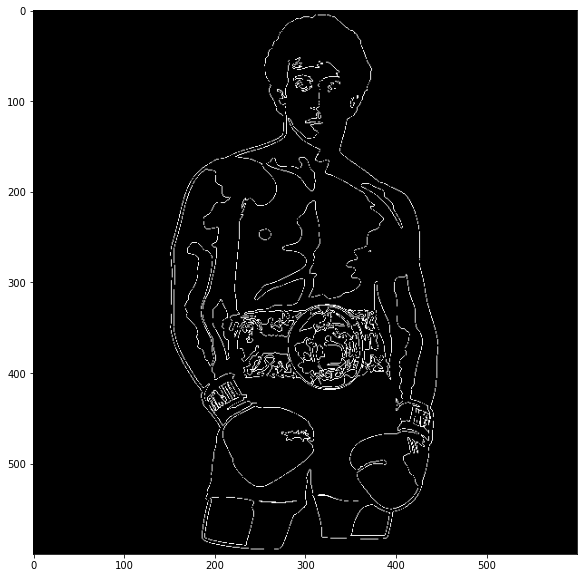

In [41]:
def invertImage(im):
    temp = 255 - im
    return temp

rockySil = colorReduction(rockyBN, 10)
rockySil = toBinary(rockySil, 100)
#rockySil = invertImage(rockySil)
plt.figure(figsize=(10,10))
plt.imshow(rockySil, cmap=plt.cm.gray)